## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [90]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [91]:
df = pd.read_csv('ab_data.csv')
# here is to read the data set using this code 

b. Use the cell below to find the number of rows in the dataset.

In [92]:
df.head()
# To know the  content of our data set 

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [93]:
df.count()
# To know how many in each column

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [94]:
df.user_id.nunique()
# To know the unique values of user ID

290584

d. The proportion of users converted.

In [95]:
df['converted'].mean()
# To know proportion of converted column by using mean.

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [96]:
df2 = df.query('group == "treatment" & landing_page != "new_page" or group == "control" & landing_page != "old_page"')
print (df2.count())
# To know number of times the new_page and treatment don't match.
## as we know treatment with new page and control with old page.

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [97]:
df.isnull().sum()
#as we can see no missing values.

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [98]:
c1 = (df['landing_page']=='new_page') & (df['group']=='treatment')
c2 = (df['landing_page']=='old_page') & (df['group']=='control')
df2 = df[c1 | c2]
df2.head()
#here we have two classifications of landing page. 
##if  it is a  new page then "group" column will be  for "treatment" otherwise will be "control" for old page.
### this formula to make sure of this, and it is as we mentioned before.
#### if it is opposite we have to delete the opposite one.
##### However, we have one convereted, which means it was converted .
###### df2 means data set contain things matched only (new page with treatment control with old page)

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [99]:
#double check all of the correct rows were removed this should be 0
df2[((df2['group'] == 'treatment') ==  (df2['landing_page']== 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [100]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [101]:
df2[df2['user_id'].duplicated()]
## duplicated one details.

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [102]:
# to catch the two rows.
df2[df2['user_id'] == 773192]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [103]:
# remove one of the duplicated to have one.
df2.drop(2893, inplace= True)
df2[df2['user_id'] == 773192]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [104]:
# To see the ratio of converted pages using mean.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [105]:
# Here is specifically the ratio converted of just control group using mean.
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [106]:
# Here is specifically the ratio converted of just treatment group using mean.
df2[df2['group'] == 'treatment'].converted.mean()
## it is less than the control ratio, but it is unremarkable difference.

0.11880806551510564

d. What is the probability that an individual received the new page?

In [107]:
# To know the count of probability of new page in df2 using count.
df2[df2['landing_page'] == 'new_page'].count()/len(df2)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

It can be seen that, the probability of old_page with control group that converted with 0.1204 is better than the second one ( new_page) with treatment group that converted with 0.1188. However, this situation is uncertain that this is not significant change due to the difference,it is very low.
As a result I need to test the hypothesis to check p.value if the change is significant or not.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypothesis Test 

H0: Pold >= Pnew



H1: Pold < Pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [108]:
#  by using mean we get the mean of converted pages in df2 for the new probability  
P_new =df2['converted'].mean()
P_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [109]:
#  by using mean we get the mean of converted pages in df2 for the old probability  
P_old = df2['converted'].mean()
P_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [110]:
# The number of new page in treatment group 
n_new = df2[df2['group'] == 'treatment'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [111]:
# The number of old page in control group 
n_old = df2[df2['group'] == 'control'].count() [0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [112]:
# we now using the simulation of 0,1 for converted pages. here for new pages.
new_page_converted = np.random.choice([1,0], size=n_new, p=[P_new, (1-P_new)])
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [113]:
# we now using the simulation of 0,1 for converted pages, but here for old pages one.
old_page_converted = np.random.choice([1,0], size=n_old, p=[P_old, (1-P_old)])
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [114]:
# here to get the mean of the converted between new and old to see if it is worth the change or not. 
new_page_converted.mean() - old_page_converted.mean()

-0.001027971560160823

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [115]:
# here we using alternative loop of 10000 for the same simulqation above
new_page_converted = np.random.binomial(n_new, P_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, P_old, 10000)/n_old
p_diffs=  new_page_converted - old_page_converted 


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

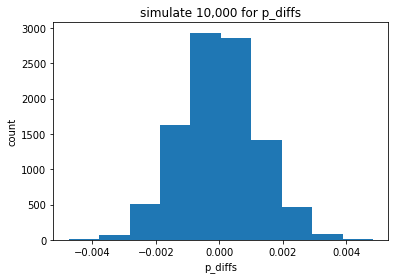

In [116]:
# here we use histgram to see our simulation visually 
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('count')
plt.title('simulate 10,000 for p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [117]:
actual_diff = df2[df2['group'] == 'treatment'].converted.mean() - df2[df2['group'] == 'control'].converted.mean()
actual_diff
# our result here related to neagative outcomes means the control converted more than the treatment

-0.0015782389853555567

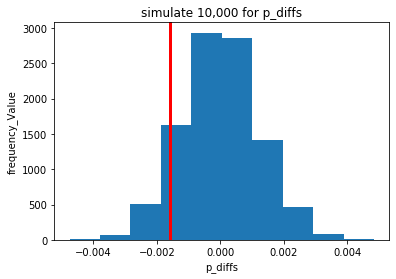

In [118]:
# to see the result visually
plt.hist(p_diffs)
plt.axvline(actual_diff, color='r', linewidth = 3)
plt.xlabel('p_diffs')
plt.ylabel('frequency_Value')
plt.title('simulate 10,000 for p_diffs');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I calculate P-value of this test but to make it success meaning to reject the null hypothesis H0. 
The P_value must be >0.95 or less than 0.05. 
Because we speak about normal dist. in this situation, we faild to reject null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [119]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page'].converted.sum()
convert_new = df2[df2['landing_page'] == 'new_page'].converted.sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]
convert_old , convert_new , n_old , n_new 

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [120]:
# here we will use Z score to know the outliers of our formula.
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')

In [121]:
p_value

0.9050583127590245

In [122]:
z_score

1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

After I did z-score test, I verfy now the fundings before that p-value not higher than 0.95 which is considered as significant so we will accept the null hypothesis  and reject the alternative based on our hypothesis testing. Yes this finding agreed with parts j& k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As this is balinery. We will use Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [123]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  new_page  old_page  control  ab_page  
0          1         0         1        1        0  
1          1         0         1        1        0  
2          1         1         0        0        1  
3          1         1         0        0        1  
4          1         0         1        1        0

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [124]:
import statsmodels.api as sm
lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [125]:
# we need summary of our data to see them in brief way 
result=lr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-06-23 16:59 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p-value associated with ab_page (treatment) = 0.190, the differ from the value you found in the part II because in part II we used one sided test but in this part the intercept added ( two sided test)  

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The only thing remindes is timestamp that's may consider it to influnce whether or not an individual converts depends on the time of the day for example in the afternoon the users traffic is high but in the morning the users spint low time, but when a situation in which two or more explanatory. variables in multiple regression model are highly linearly related then we have multicollinearity which considered a problem

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [126]:
df3= pd.read_csv('./countries.csv')
df3.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [127]:
df4 = pd.merge(df2, df3, how='inner', on='user_id')
df4.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  new_page  old_page  control  ab_page country  
0          1         0         1        1        0      US  
1          1         0         1        1        0      US  
2          1         1         0        0        1      US  
3          1         1         0        0        1      US  
4          1         0         1        1        0      US

In [128]:
df4.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [129]:
countries= pd.get_dummies(df4['country'])
df4[['CA','UK','US']] = countries
df4.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  new_page  old_page  control  ab_page country  CA  UK  US  
0          1         0         1        1        0      US   0   0   1  
1          1         0         1        1        0      US   0   0   1  
2          1         1         0        0        1      US   0   0   1  
3          1         1         0        0        1      US   0   0   1  
4          1         0         1        1        0      US   0   0   1

In [130]:
model_new = sm.Logit(df4['converted'], df4[['intercept','ab_page','US','UK']])
results_new = model_new.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [131]:
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:59:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [132]:
df4[['US', 'UK','CA']] = pd.get_dummies(df4['country'])[['US', 'UK', 'CA']]

In [133]:
df4['UK_new'] = df4['UK'] * df4['ab_page']
df4['US_new'] = df4['US'] * df4['ab_page']

In [134]:
lm = sm.Logit(df4['converted'], df4[['intercept','ab_page', 'UK', 'US','UK_new','US_new']])
results_page_countries = lm.fit()
results_page_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        16:59:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

conclusion:
Since the P-value of conversion depending on page and countries is greater than 0.05,it is not significant.
In UK, as the number of new_page decreases, conversion rate is 0.92 times as likely as In Canada, holding all else constant.
In US, as the number of new_page decreases, conversion rate is 0.95 times as likely as for old_page, holding all else constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!